In [638]:
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
import importlib
import model
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import tqdm

In [639]:
importlib.reload(model)

<module 'model' from 'd:\\Documents\\machinelearning\\ShiftedChebyKAN\\model.py'>

In [640]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.layers(x)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [641]:
from model import GRAMLayer

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 32),
            nn.LayerNorm(32),
            nn.Linear(32, 16),
            nn.LayerNorm(16),
            nn.Linear(16, 10),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.layers(x)
    
class GRAM(nn.Module):
    def __init__(self):
        super(GRAM, self).__init__()
        self.layers = nn.Sequential(
            GRAMLayer(28*28, 32),
            nn.LayerNorm(32),
            GRAMLayer(32, 16),
            nn.LayerNorm(16),
            GRAMLayer(16, 10)
        )

    def forward(self, x):
        #x = x.to("cuda")
        x = x.view(x.size(0), -1)
        return self.layers(x)

In [642]:
def train_and_test_model(model, epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    train_losses = []  # List to store the training loss values
    test_losses = []  # List to store the test loss values
    accuracies = []  # List to store the test accuracies

    for epoch in range(epochs):  # number of epochs
        epoch_loss = 0
        for images, labels in tqdm.tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))

        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm.tqdm(test_loader):
                outputs = model(images)
                loss = nn.CrossEntropyLoss()(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_losses.append(test_loss / len(test_loader))
        accuracies.append(correct / total)

        print('Epoch: {}, Train Loss: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.2f}'.format(
            epoch, train_losses[-1], test_losses[-1], accuracies[-1]))

    return train_losses, test_losses, accuracies

100%|██████████| 313/313 [00:02<00:00, 148.56it/s]


Epoch: 0, Train Loss: 0.8814, Test Loss: 0.5434, Test Acc: 0.92


100%|██████████| 313/313 [00:02<00:00, 150.24it/s]


Epoch: 1, Train Loss: 0.4536, Test Loss: 0.3813, Test Acc: 0.94


100%|██████████| 313/313 [00:02<00:00, 138.16it/s]


Epoch: 2, Train Loss: 0.3351, Test Loss: 0.2950, Test Acc: 0.94


100%|██████████| 313/313 [00:02<00:00, 116.45it/s]


Epoch: 3, Train Loss: 0.2660, Test Loss: 0.2485, Test Acc: 0.95


100%|██████████| 313/313 [00:02<00:00, 135.53it/s]


Epoch: 4, Train Loss: 0.2214, Test Loss: 0.2118, Test Acc: 0.95


100%|██████████| 313/313 [00:02<00:00, 134.06it/s]


Epoch: 5, Train Loss: 0.1893, Test Loss: 0.1964, Test Acc: 0.95


100%|██████████| 313/313 [00:02<00:00, 133.30it/s]


Epoch: 6, Train Loss: 0.1675, Test Loss: 0.1783, Test Acc: 0.96


100%|██████████| 313/313 [00:02<00:00, 138.34it/s]


Epoch: 7, Train Loss: 0.1511, Test Loss: 0.1651, Test Acc: 0.96


100%|██████████| 313/313 [00:02<00:00, 134.57it/s]


Epoch: 8, Train Loss: 0.1379, Test Loss: 0.1515, Test Acc: 0.96


100%|██████████| 313/313 [00:02<00:00, 140.04it/s]


Epoch: 9, Train Loss: 0.1271, Test Loss: 0.1493, Test Acc: 0.96


100%|██████████| 313/313 [00:01<00:00, 170.66it/s]


Epoch: 0, Train Loss: 0.8729, Test Loss: 0.5424, Test Acc: 0.90


100%|██████████| 313/313 [00:01<00:00, 168.88it/s]


Epoch: 1, Train Loss: 0.4472, Test Loss: 0.3694, Test Acc: 0.91


100%|██████████| 313/313 [00:01<00:00, 170.22it/s]


Epoch: 2, Train Loss: 0.3434, Test Loss: 0.3090, Test Acc: 0.92


100%|██████████| 313/313 [00:01<00:00, 166.84it/s]


Epoch: 3, Train Loss: 0.3015, Test Loss: 0.2868, Test Acc: 0.92


100%|██████████| 313/313 [00:01<00:00, 169.38it/s]


Epoch: 4, Train Loss: 0.2800, Test Loss: 0.2731, Test Acc: 0.92


100%|██████████| 313/313 [00:01<00:00, 171.34it/s]


Epoch: 5, Train Loss: 0.2661, Test Loss: 0.2635, Test Acc: 0.93


100%|██████████| 313/313 [00:01<00:00, 170.15it/s]


Epoch: 6, Train Loss: 0.2547, Test Loss: 0.2587, Test Acc: 0.93


100%|██████████| 313/313 [00:01<00:00, 170.06it/s]


Epoch: 7, Train Loss: 0.2444, Test Loss: 0.2468, Test Acc: 0.93


100%|██████████| 313/313 [00:01<00:00, 164.62it/s]


Epoch: 8, Train Loss: 0.2349, Test Loss: 0.2523, Test Acc: 0.93


100%|██████████| 313/313 [00:01<00:00, 167.75it/s]


Epoch: 9, Train Loss: 0.2269, Test Loss: 0.2327, Test Acc: 0.93


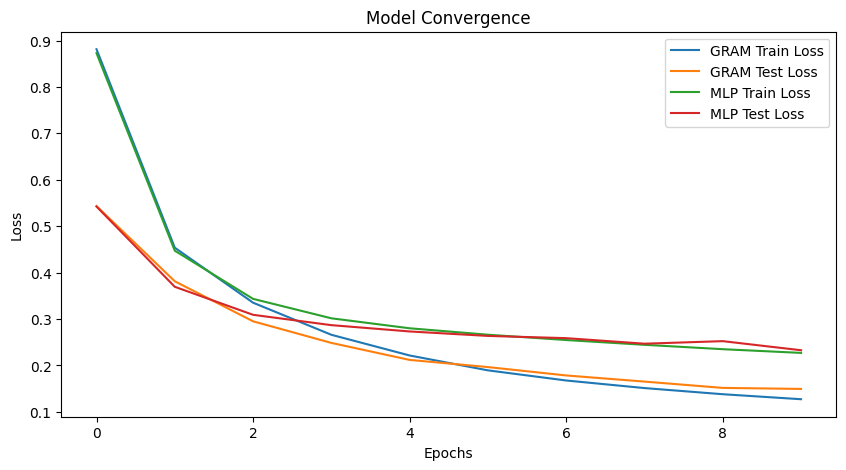

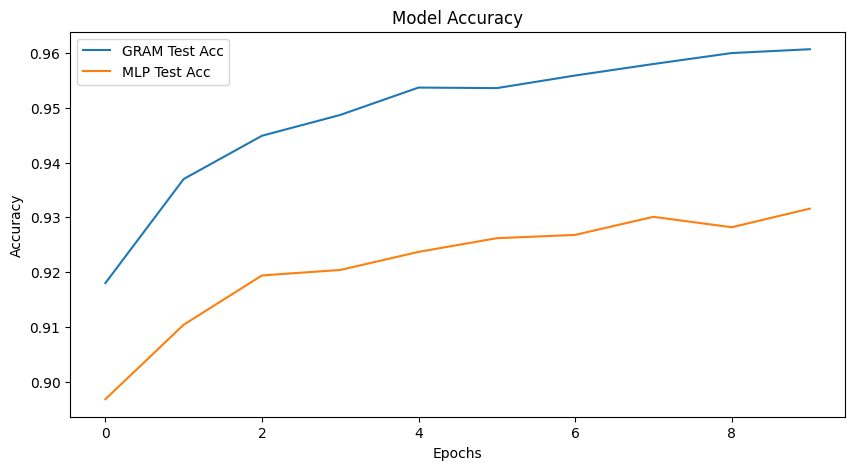

In [643]:
# Train the GRAM model
model = GRAM()
gram_train_losses, gram_test_losses, gram_accuracies = train_and_test_model(model, 10)

# Train the MLP model
model = MLP()
mlp_train_losses, mlp_test_losses, mlp_accuracies = train_and_test_model(model, 10)

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(gram_train_losses, label='GRAM Train Loss')
plt.plot(gram_test_losses, label='GRAM Test Loss')
plt.plot(mlp_train_losses, label='MLP Train Loss')
plt.plot(mlp_test_losses, label='MLP Test Loss')
plt.title('Model Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(gram_accuracies, label='GRAM Test Acc')
plt.plot(mlp_accuracies, label='MLP Test Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()